# Boston Housing Dataset

In this notebook we do a comparative study of the accuracy obtained on the prediction for the Boston Housing Dataset by both **Linear Regression** and **Polynomial Regression**.

In [1]:
#Import of the libraries and visualization modules
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

## Dataset import

In [2]:
from sklearn.datasets import load_boston

boston_data = load_boston() #data is a dictionary
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston_data.DESCR) #All the information needed to truly understand the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Working with dataset as Pandas DF
boston = pd.DataFrame(data = boston_data.data, columns = boston_data.feature_names)
boston["TARGET"] = boston_data.target #target = MEDV feature
boston.head(5) #data is all numeric but with very diferent ranges, so we need to scale data with f.e. minmax scaler

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.info() #there are not missing values and all features are float64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Data Visualization

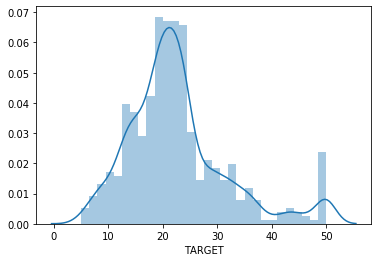

In [7]:
sns.distplot(boston["TARGET"], bins = 30); #Histogram plot showing the distribution of the target values.Pseudo-normal distribution

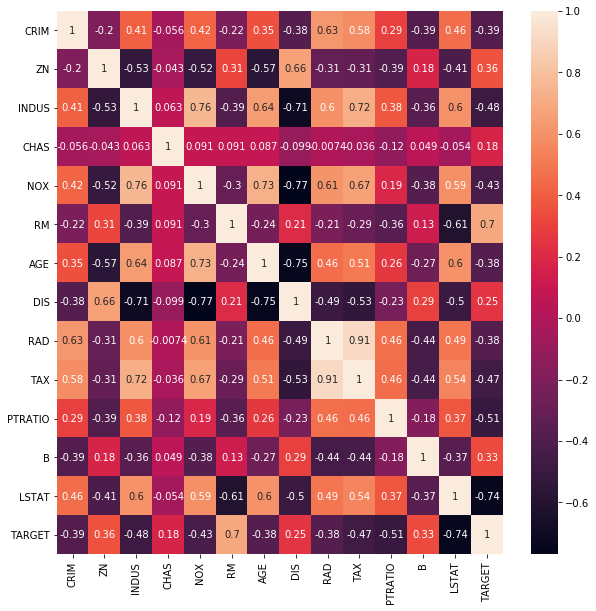

In [8]:
correlation = boston.corr(method = "pearson")
fig = plt.subplots(figsize = (10,10)) #figsize in inches
sns.heatmap(data = correlation, annot = True);

### OBSERVATIONS:

    -There are 2 variables that are very related with the TARGET: LSTAT (-0.74) & RM (0.7), this would propably be the ones that affect the most to determining the value of our target.
    -There are 2 variables that are very correlated between themselves: TAX & RAD (0.91) so we'll avoid using both of them to prevent multi-colinearity. In case it's need it we'll use TAX because it was more correlation with the TARGET.

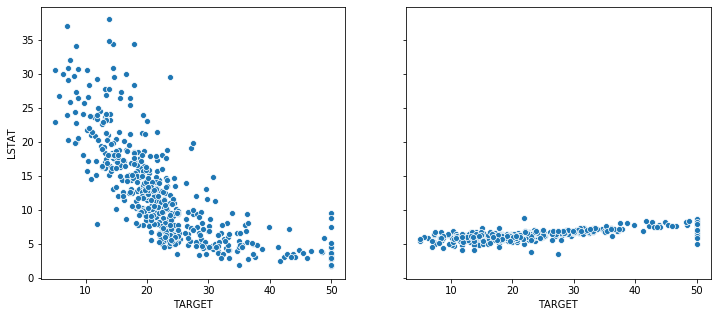

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True, figsize=(12, 5))
#Scatter plot to see the correlation between the target and LSTAT
sns.scatterplot(x = "TARGET", y = "LSTAT", data = boston, ax = ax1);
#Scatter plot to see the correlation between the target and RM
sns.scatterplot(x = "TARGET", y = "RM", data = boston, ax = ax2);

## Data preparation for model

In [10]:
#Generation of a model only with the features with higher correlations
X = boston[["LSTAT", "RM"]]
y = boston["TARGET"]

In [11]:
from sklearn.model_selection import train_test_split

#Spliting training:test dataset in 80:20 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
print("X_train:",X_train.shape, "& X_test:", X_test.shape)
print("y_train:",y_train.shape, "& y_test:", y_test.shape)

X_train: (404, 2) & X_test: (102, 2)
y_train: (404,) & y_test: (102,)


## Linear Regression model

In [12]:
#Import model and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#Model construction
lg_model = LinearRegression(n_jobs = -1, copy_X = False)
lg_model.fit(X = X_train, y = y_train)
print("Linear Regression intercep:", round(lg_model.intercept_, 5), "Linear Regression coeficients:", lg_model.coef_)

Linear Regression intercep: -3.84118 Linear Regression coeficients: [-0.63249856  5.46509877]


In [40]:
#Evaluation of the model performance on train & test
y_train_predict = lg_model.predict(X_train)
r2_train = r2_score(y_train, y_train_predict)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))

y_test_predict = lg_model.predict(X_test)
r2_test = r2_score(y_test, y_test_predict)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))

In [42]:
print("Performance on train: R2 =", round(r2_train, 4), "& RMSE =", round(rmse_train, 4))
print("Performance on test: R2 =", round(r2_test, 4), "& RMSE =", round(rmse_test, 4))

Performance on train: R2 = -7.5177 & RMSE = 27.2022
Performance on test: R2 = 0.574 & RMSE = 5.5896


**Lets see the model performance visually. Let's plot y vs y_pred**

Both for train (left) & test (right) if the fit is good the data should show a perfect line.

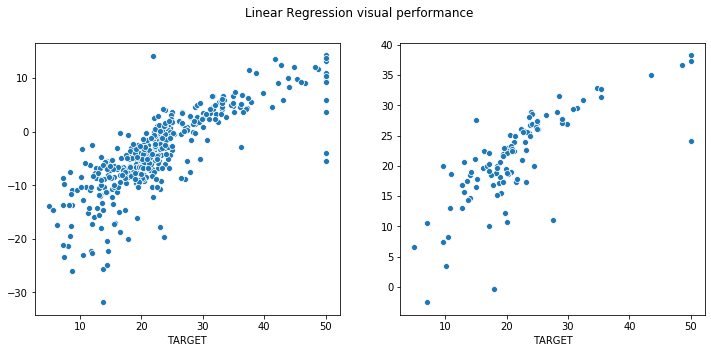

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 5), sharex = False, sharey = False)
fig.suptitle("Linear Regression visual performance")
sns.scatterplot(x = y_train, y = y_train_predict, ax = ax1)
sns.scatterplot(x = y_test, y = y_test_predict, ax = ax2, )
plt.show()

The represented data does not represent a line, what means that a Linear Regression model **is not adequate** for this dataset.

## Polynomial Regression model
In the first representation, we can see that **LSTAT** doesn't vary in a linear way in relation to the TARGET (value of the houses in 1000$). Maybe by applying a Polynomial Regression with **degree 2** we obtain better results, let's try and test this option.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_g2 = PolynomialFeatures(degree = 2)
X_train_poly = poly_g2.fit_transform(X_train) #Transformation of the data to apply a LinearRegression model

In [36]:
poly_model = LinearRegression(n_jobs = -1)
poly_model.fit(X_train_poly, y_train)
print("Polynomial Regression intercep:", round(poly_model.intercept_, 5), "Plynomial Regression coeficients:", poly_model.coef_)

Polynomial Regression intercep: 20.69023 Plynomial Regression coeficients: [ 0.         -0.87211493  3.57707162  0.01285007 -0.20593075  1.64011727]


In [44]:
#Evaluation of the model performance on train & test
train_poly_predict = poly_model.predict(X_train_poly)
r2_train_poly = r2_score(y_train, train_poly_predict)
rmse_train_poly = np.sqrt(mean_squared_error(y_train, train_poly_predict))

X_test_poly = poly_g2.fit_transform(X_test)
test_poly_predict = poly_model.predict(X_test_poly)
r2_test_poly = r2_score(y_test, test_poly_predict)
rmse_test_poly = np.sqrt(mean_squared_error(y_test, test_poly_predict))

In [45]:
print("Performance on train: R2 =", round(r2_train_poly, 4), "& RMSE =", round(rmse_train_poly, 4))
print("Performance on test: R2 =", round(r2_test_poly, 4), "& RMSE =", round(rmse_test_poly, 4))

Performance on train: R2 = 0.7576 & RMSE = 4.5888
Performance on test: R2 = -50.6969 & RMSE = 61.5722


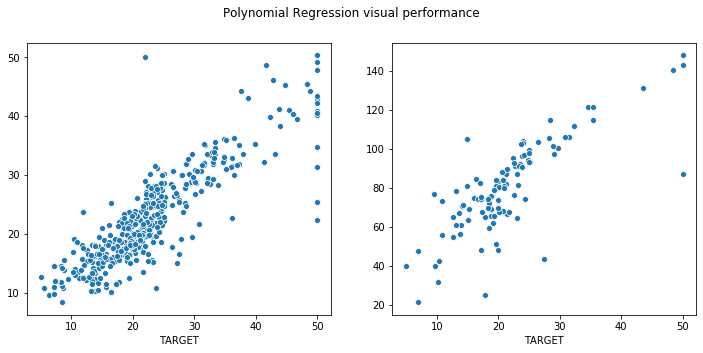

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 5), sharey = False)
fig.suptitle("Polynomial Regression visual performance")
sns.scatterplot(x = y_train, y = train_poly_predict, ax = ax1)
sns.scatterplot(x = y_test, y = test_poly_predict, ax = ax2, )
plt.show()

In this visual representation we can see that the data is more like to addapt to a line, that with the Linear Regression, even though the model is still not perfect.